# SI 370 Kaggle: Restaurant Revenue Predictions

In [115]:
import pandas as pd
import numpy as np
import math
from datetime import datetime

import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd

from sklearn import metrics
import os

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [116]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [117]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [118]:
test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [119]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [120]:
## Convert the dates to number of open days 

train['Open Date'] = pd.to_datetime(train['Open Date'], format='%m/%d/%Y')
test['Open Date'] = pd.to_datetime(test['Open Date'], format='%m/%d/%Y')

date_format = "%m/%d/%Y"
recent_date = datetime.strptime('11/19/2019', date_format)

train['OpenDays'] = recent_date - train['Open Date']
train['OpenDays'] = train['OpenDays'].astype('timedelta64[D]').astype(int)
# train = train.drop(columns = ['Open Date', 'Id'], axis = 1)

test['OpenDays'] = recent_date - test['Open Date']
test['OpenDays'] = test['OpenDays'].astype('timedelta64[D]').astype(int)
# test = test.drop(columns = ['Open Date', 'Id'], axis = 1)

train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,7430
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,4296
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,2446
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2847
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3846


In [121]:
# Visualization Ideas: Heatmap, Bar Graph for correlation, Dimension Reduction, Important features graph 

In [122]:
train = train.dropna()
test = test.dropna()

In [123]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,7430
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,4296
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,2446
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2847
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3846


In [124]:
## Get dummies 

train_dummies = pd.get_dummies(train,columns=['City','City Group','Type'])
train_dummies_no_revenue = train_dummies.drop(['revenue','Id','Open Date'], axis=1)
train_dummies.shape

(137, 80)

In [125]:
train_dummies_no_revenue.head(1)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,1,0,0,1,0,0,0,1


/Users/tiannyylu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


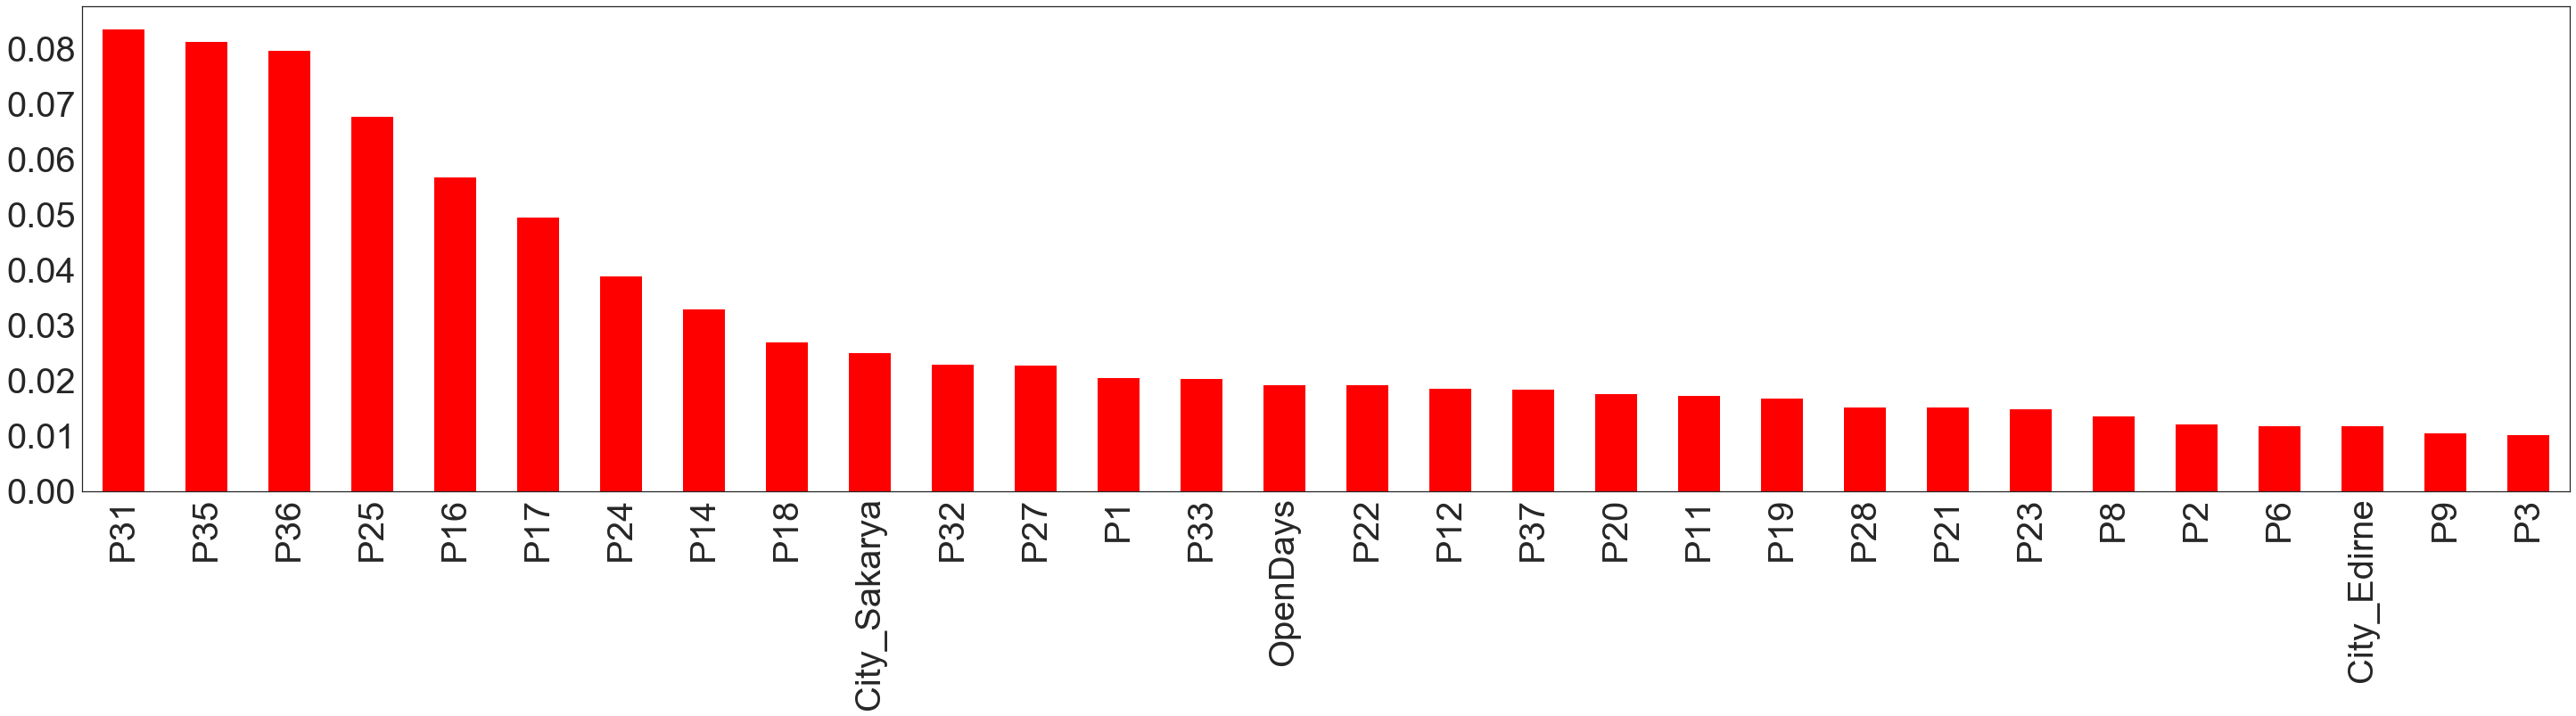

In [126]:
## Find most important features in dataset 

X = train_dummies_no_revenue.iloc[:,0:-2]  #independent columns
y = train_dummies_no_revenue.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='bar', colormap = 'hsv', figsize = (50, 10), fontsize = 40)
plt.show()

In [127]:

def corr_check(name):
    column_corr = train.groupby(name).corr().reset_index().rename(columns = {'level_1':'Column'})[[name, 'Column', 'Id']]
    column_corr = column_corr.pivot(index = 'Column', columns = name).drop('Id')['Id']
    data = dict()
    index = column_corr.index
    for x in column_corr:
        temp = column_corr[x].abs()
        data[x] = temp.to_list()
    return pd.DataFrame(data, index = index)

In [128]:
#['City','City Group','Type']
# corr_check('City').dropna(how = 'all', axis = 1).fillna(0).head()

In [129]:
# corr_check('City Group').head()

In [130]:
# corr_check('Type').dropna(how = 'all', axis = 1).head()

In [131]:
## Build and train the classifier
# dt_model = sktree.DecisionTreeClassifier(max_depth=1,
#                                          criterion='entropy')


# dt_model.fit(train_dummies_no_revenue,train['revenue'])

In [132]:
# predicted_revenue = dt_model.predict(train_dummies_no_revenue)
# train['predicted_revenue'] = predicted_revenue
# train.sample(10)

### Finding the correlations between numerical variables and revenue

In [133]:
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train.select_dtypes(include=['object']).columns.tolist()

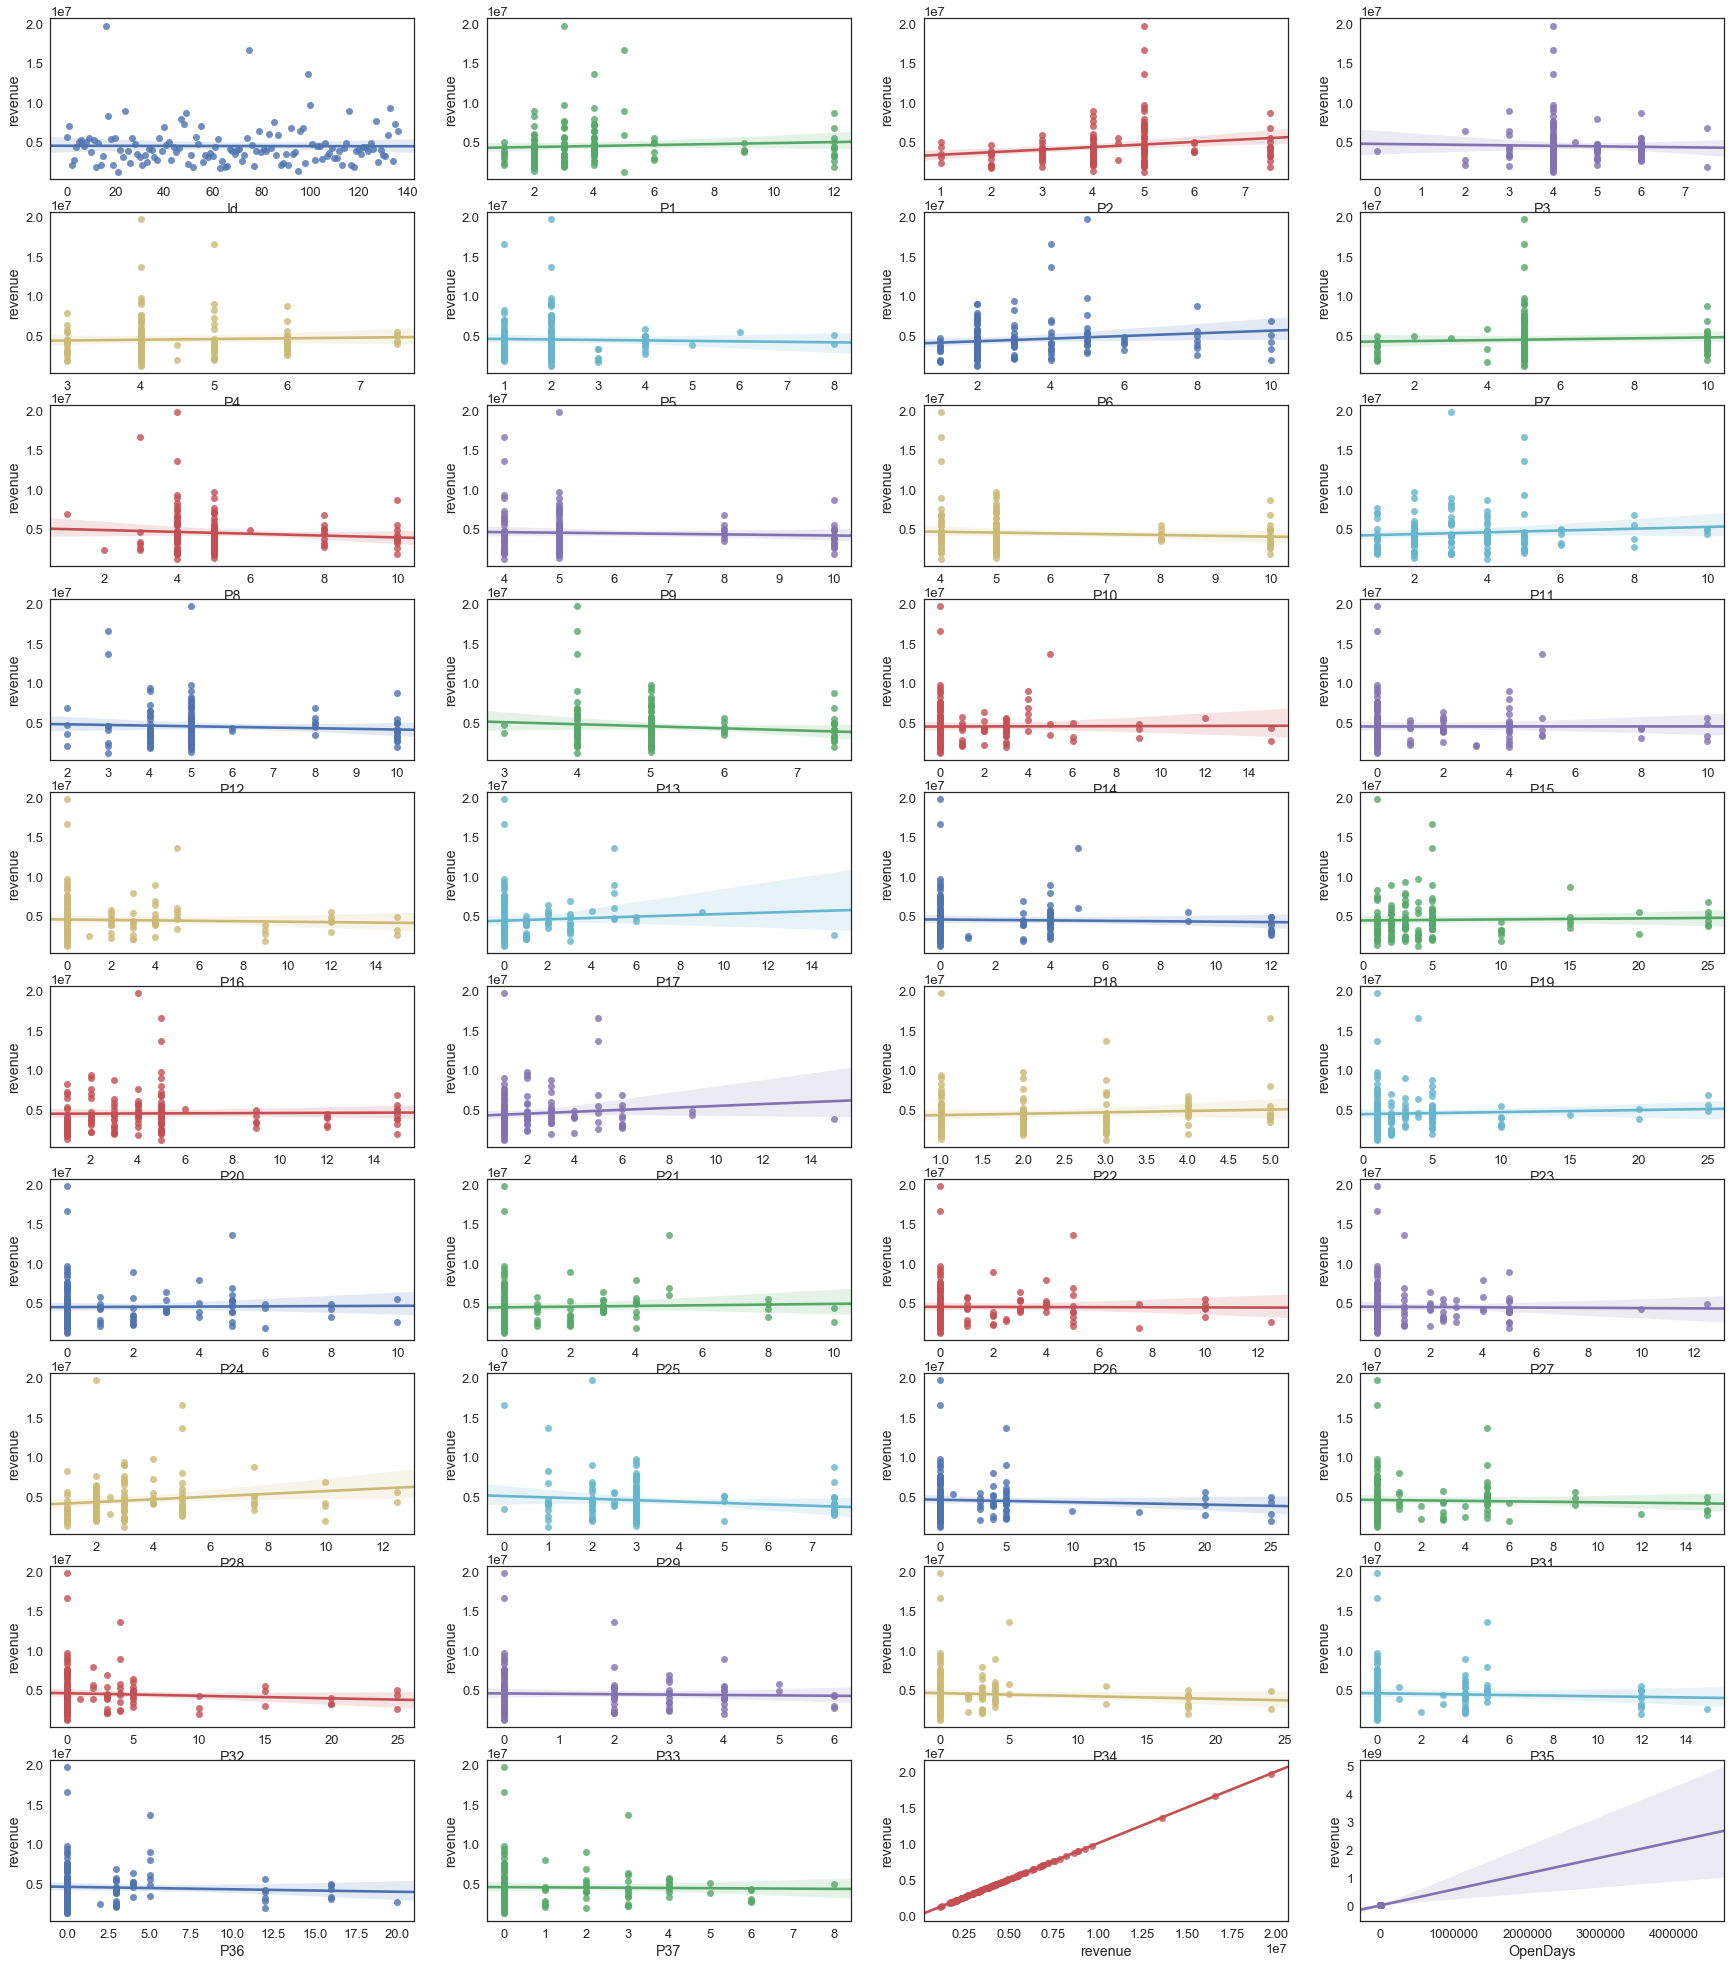

In [134]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=train[variable], y=train['revenue'], ax=subplot)

### Correlations between all variables

Text(0.5,1,'Correlations between all variables in "train" dataframe')

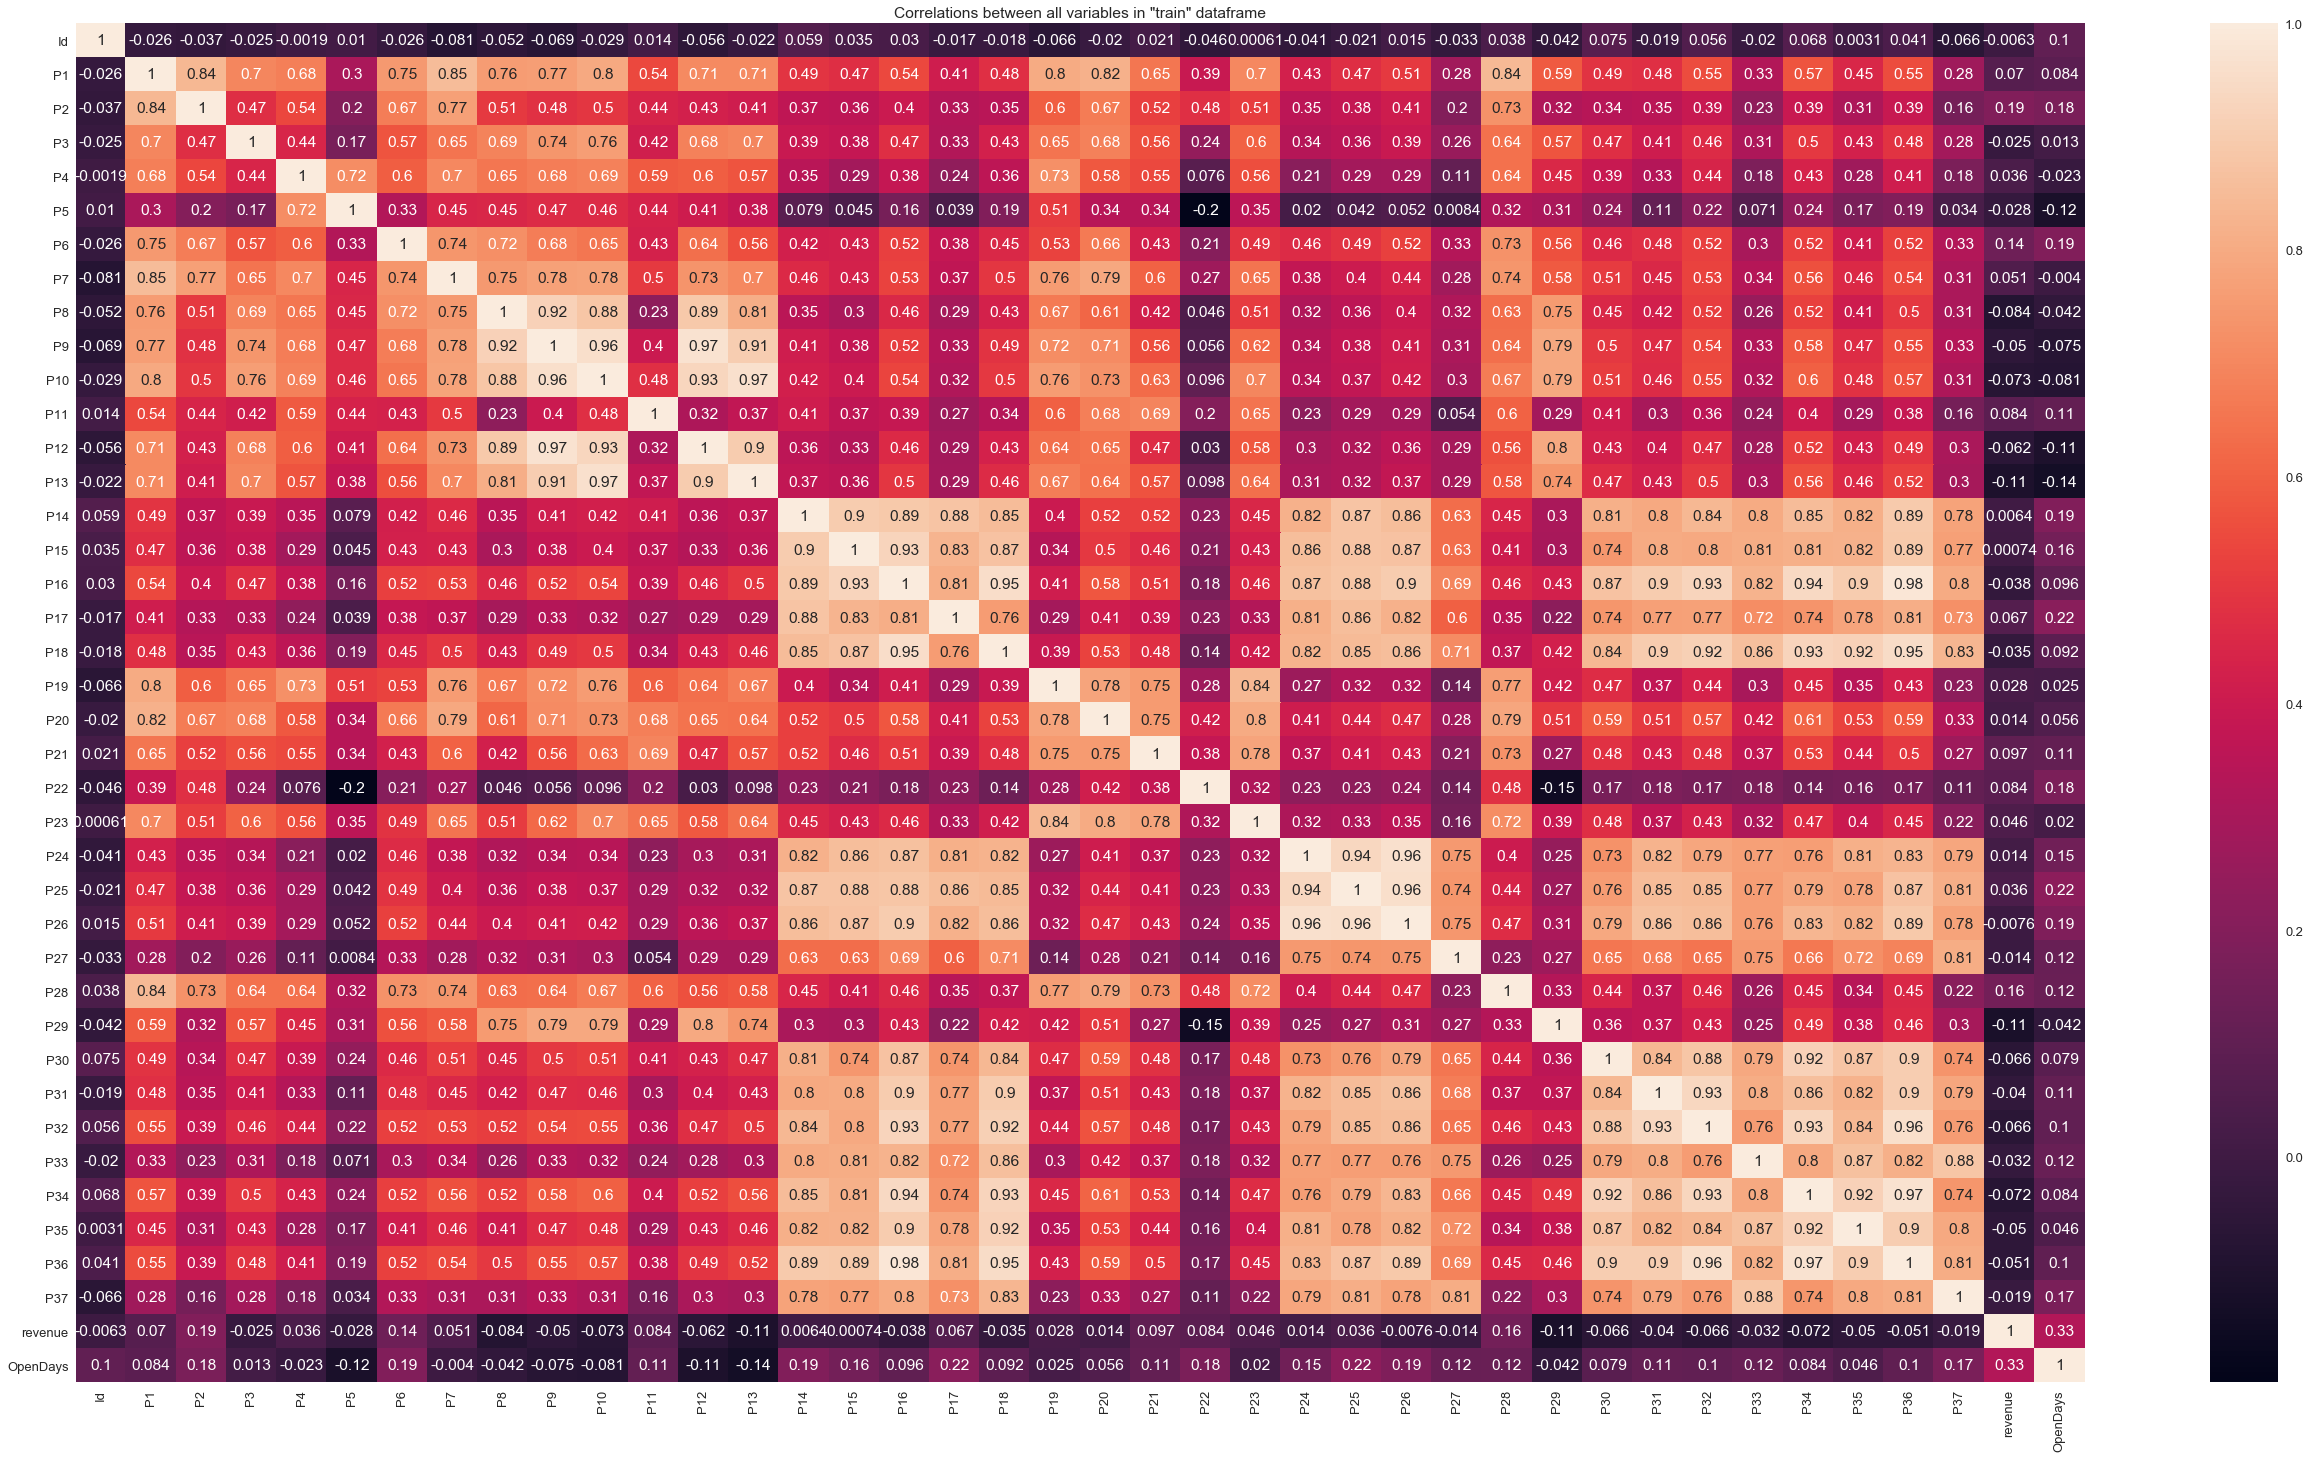

In [135]:
train.columns
plt.figure(figsize=(45,25))
sns.heatmap(train.corr(),annot=True)
plt.title('Correlations between all variables in "train" dataframe')

### Building the Pipeline to predict revenue

In [216]:
## Pipeline to determine best classifier 

y = train['revenue']
X = train.drop(['revenue'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [212]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [213]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).drop('revenue',axis=1).columns
categorical_features = train.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [214]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(nu=0.1,probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score((X_test, y_test)))
## Error: Expected 2d array, got 1d instead 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


ValueError: Expected 2D array, got 1D array instead:
array=[      Id  Open Date       City  City Group Type  P1   P2   P3   P4  P5  \
48    48 2011-12-21    Kayseri       Other   FC   4  5.0  4.0  4.0   2   
130  130 2011-10-29   Osmaniye       Other   FC   3  4.0  3.0  4.0   2   
45    45 2012-02-02    Antalya       Other   FC   6  6.0  6.0  4.5   2   
38    38 2011-01-18   İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   
100  100 2007-09-21   İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   
128  128 2011-10-14     Ankara  Big Cities   FC   2  4.0  4.0  4.0   1   
26    26 2010-02-23     Ankara  Big Cities   IL   3  5.0  4.0  5.0   2   
95    95 2012-06-08     Samsun       Other   FC   2  4.0  4.0  4.0   2   
101  101 2012-09-09  Balıkesir       Other   IL   3  4.0  5.0  4.0   2   
29    29 2006-10-13     Ankara  Big Cities   FC   1  1.0  4.0  4.0   2   
49    49 2008-04-01   İstanbul  Big Cities   FC  12  7.5  6.0  6.0   2   
34    34 2012-03-21   İstanbul  Big Cities   FC   4  5.0  4.0  4.0   1   
13    13 2010-10-16   İstanbul  Big Cities   FC   4  5.0  4.0  4.0   1   
5      5 2010-02-12     Ankara  Big Cities   FC   6  6.0  4.5  7.5   8   
111  111 2012-08-10    Kütahya       Other   FC   2  3.0  4.0  4.0   2   
1      1 2008-02-14     Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   
36    36 2008-05-09     Ankara  Big Cities   FC   3  5.0  5.0  3.0   1   
9      9 2011-11-16     Edirne       Other   IL   6  4.5  6.0  7.5   6   
69    69 2011-08-30      Konya       Other   IL   2  2.0  4.0  5.0   4   
18    18 2012-04-21      İzmir  Big Cities   IL   4  5.0  4.0  3.0   1   
68    68 2010-03-16   İstanbul  Big Cities   IL   2  4.0  3.0  4.0   2   
30    30 2008-12-01    Sakarya       Other   IL   1  1.0  3.0  3.0   2   
88    88 2013-07-10    Antalya       Other   FC   1  2.0  5.0  4.0   1   
76    76 2008-11-25   İstanbul  Big Cities   FC   2  2.0  4.0  4.0   2   
131  131 2002-11-06     Ankara  Big Cities   FC   3  4.0  4.0  5.0   3   
40    40 2011-02-09   İstanbul  Big Cities   IL   3  5.0  4.0  4.0   2   
14    14 2011-12-29      Bursa       Other   FC   2  2.0  4.0  4.0   1   
107  107 2011-05-01     Samsun       Other   IL   4  4.0  4.0  4.0   1   

       ...     P29  P30  P31  P32  P33  P34  P35  P36  P37  OpenDays  
48     ...     3.0    0    0    0    0    0    0    0    0      2890  
130    ...     3.0    0    0    0    0    0    0    0    0      2943  
45     ...     7.5    0    0    0    0    0    0    0    0      2847  
38     ...     2.0    0    0    0    0    0    0    0    0      3227  
100    ...     3.0    0    0    0    0    0    0    0    0      4442  
128    ...     2.0    0    0    0    0    0    0    0    0      2958  
26     ...     3.0    5    5    4    3    3    4    3    1      3556  
95     ...     3.0    0    0    0    0    0    0    0    0      2720  
101    ...     3.0    5    5    5    5    4    5    5    4      2627  
29     ...     3.0    0    0    0    0    0    0    0    0      4785  
49     ...     7.5    0    0    0    0    0    0    0    0      4249  
34     ...     3.0    0    0    0    0    0    0    0    0      2799  
13     ...     3.0    0    0    0    0    0    0    0    0      3321  
5      ...     5.0    0    0    0    0    0    0    0    0      3567  
111    ...     3.0    0    0    0    0    0    0    0    0      2657  
1      ...     3.0    0    0    0    0    0    0    0    0      4296  
36     ...     3.0    0    0    0    0    0    0    0    0      4211  
9      ...     2.5    0    0    0    0    0    0    0    0      2925  
69     ...     3.0    0    0    0    0    0    0    0    0      3003  
18     ...     3.0    3    5    5    4    4    4    3    2      2768  
68     ...     3.0    5    5    5    4    4    4    3    4      3535  
30     ...     3.0    0    0    0    0    0    0    0    0      4005  
88     ...     2.0    0    0    0    0    0    0    0    0      2323  
76     ...     3.0    0    0    0    0    0    0    0    0      4011  
131    ...     2.0    0    0    0    0    0    0    0    0      6222  
40     ...     2.0    5    5    3    3    3    4    3    2      3205  
14     ...     3.0    0    0    0    0    0    0    0    0      2882  
107    ...     1.0    5    5    5    3    4    4    4    3      3124  

[28 rows x 43 columns]
 48     7201784.0
130    3376145.0
45     3752885.0
38     5461700.0
100    9652350.0
128    2383840.0
26     2267425.0
95     1270499.0
101    4758476.0
29     3447890.0
49     8630682.0
34     4100886.0
13     4807746.0
5      5017319.0
111    2993069.0
1      6923131.0
36     3028267.0
9      5444227.0
69     3452382.0
18     5337526.0
68     3836721.0
30     3008199.0
88     2025297.0
76     4590423.0
131    3199619.0
40     6836483.0
14     1999097.0
107    3248660.0
Name: revenue, dtype: float64].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [215]:
X_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
48,48,2011-12-21,Kayseri,Other,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2890
130,130,2011-10-29,Osmaniye,Other,FC,3,4.0,3.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2943
45,45,2012-02-02,Antalya,Other,FC,6,6.0,6.0,4.5,2,...,7.5,0,0,0,0,0,0,0,0,2847
38,38,2011-01-18,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,3227
100,100,2007-09-21,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,4442
128,128,2011-10-14,Ankara,Big Cities,FC,2,4.0,4.0,4.0,1,...,2.0,0,0,0,0,0,0,0,0,2958
26,26,2010-02-23,Ankara,Big Cities,IL,3,5.0,4.0,5.0,2,...,3.0,5,5,4,3,3,4,3,1,3556
95,95,2012-06-08,Samsun,Other,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2720
101,101,2012-09-09,Balıkesir,Other,IL,3,4.0,5.0,4.0,2,...,3.0,5,5,5,5,4,5,5,4,2627
29,29,2006-10-13,Ankara,Big Cities,FC,1,1.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,4785


### Using Random Forest Classifier

In [249]:
from sklearn.ensemble import RandomForestRegressor

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=200))])

In [250]:
rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [251]:
rf.score(X_test, y_test)

0.23167352298552746